In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression

# 1. Prediction

In [2]:
 # load data
data = pd.read_csv("data/AnnualMotorVehicleInspectionPassingRateofMotorVehiclesonFirstInspection.csv")
data.head()

year  type age  number_reported  number_passed  passing_rate
0  2006  Cars   1              455            432          94.9
1  2006  Cars   2             1082           1026          94.8
2  2006  Cars   3            73558          68432          93.0
3  2006  Cars   4              627            560          89.3
4  2006  Cars   5            17963          16716          93.1

In [3]:
data = data.loc[data['type']=="Motorcycles"]

## Task 1: What's the average passing rate on first inspection each year, taking into account motorcycles of all age groups?

In [4]:
avg_pass_data = data.groupby(['year']).mean('passing_rate').reset_index()[['year', 'passing_rate']].rename(columns={'year':'year', 'passing_rate':'avg_passing_rate'})

In [5]:
avg_pass_data

year  avg_passing_rate
0   2006         92.990909
1   2007         93.686925
2   2008         93.870527
3   2009         93.873521
4   2010         93.981256
5   2011         94.045351
6   2012         92.791833
7   2013         89.050335
8   2014         83.116493
9   2015         86.459294
10  2016         87.506665
11  2017         87.604945

In [6]:
for index, row in avg_pass_data.iterrows():
    print(f"The average passing rate for the year {row['year']} is {row['avg_passing_rate']}")

The average passing rate for the year 2006.0 is 92.99090909090908
The average passing rate for the year 2007.0 is 93.68692477454546
The average passing rate for the year 2008.0 is 93.87052690363636
The average passing rate for the year 2009.0 is 93.87352115272728
The average passing rate for the year 2010.0 is 93.98125627636364
The average passing rate for the year 2011.0 is 94.04535092
The average passing rate for the year 2012.0 is 92.79183262000001
The average passing rate for the year 2013.0 is 89.0503348309091
The average passing rate for the year 2014.0 is 83.11649264636364
The average passing rate for the year 2015.0 is 86.45929362272727
The average passing rate for the year 2016.0 is 87.5066648109091
The average passing rate for the year 2017.0 is 87.60494546545455


## Task 2: For motorcycles of each age, estimate their passing rate next year

In [7]:
age_data = data.groupby(['year', 'age']).mean('passing_rate').reset_index()[['year', 'age', 'passing_rate']].rename(columns={'year':'year', 'age':'age', 'passing_rate':'avg_passing_rate'})
age_data['age'] = ['11' if i=='>10' else i for i in age_data['age']]
age_data.loc[age_data['year']==2016]

year age  avg_passing_rate
110  2016   1          0.000000
111  2016  10         96.185936
112  2016   2         97.142857
113  2016   3         97.060553
114  2016   4         96.389363
115  2016   5         96.380626
116  2016   6         96.084074
117  2016   7         96.242638
118  2016   8         95.936844
119  2016   9         96.099393
120  2016  11         95.051028

In [8]:
# train/test split
next_year = 2017
train_data = age_data.loc[age_data['year']!=next_year]
test_data = age_data.loc[age_data['year']==next_year]
X_train = train_data[['year','age']]
y_train = train_data['avg_passing_rate']
X_test = test_data[['year','age']]
y_test = test_data['avg_passing_rate']

In [9]:
# fit model and make predictions
regressor = LinearRegression()  
model = regressor.fit(X_train, y_train) 
y_pred = model.predict(X_test)

In [10]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 16.59314606001377
Mean Squared Error: 692.9497090437392
Root Mean Squared Error: 26.323937947118385


In [11]:
next_year_rate_df = X_test
next_year_rate_df['predicted_avg_passing_rate'] = y_pred
next_year_rate_df['actual_avg_passing_rate'] = y_test
next_year_rate_df['age'] = ['>10' if i=='11' else i for i in next_year_rate_df['age']]

In [12]:
for index, row in next_year_rate_df.iterrows():
    print(f"The estimated passing rate for motorcyles aged {row['age']} for next year {row['year']} is {row['predicted_avg_passing_rate']}")

The estimated passing rate for motorcyles aged 1 for next year 2017 is 80.29276357089225
The estimated passing rate for motorcyles aged 10 for next year 2017 is 89.8646597871898
The estimated passing rate for motorcyles aged 2 for next year 2017 is 81.35630759492528
The estimated passing rate for motorcyles aged 3 for next year 2017 is 82.41985161895832
The estimated passing rate for motorcyles aged 4 for next year 2017 is 83.48339564299135
The estimated passing rate for motorcyles aged 5 for next year 2017 is 84.54693966702439
The estimated passing rate for motorcyles aged 6 for next year 2017 is 85.61048369105765
The estimated passing rate for motorcyles aged 7 for next year 2017 is 86.67402771509069
The estimated passing rate for motorcyles aged 8 for next year 2017 is 87.73757173912372
The estimated passing rate for motorcyles aged 9 for next year 2017 is 88.80111576315676
The estimated passing rate for motorcyles aged >10 for next year 2017 is 90.92820381122283


## Task 3: Assuming your estimated rates are true, can you suggest a sensible range of possible passing ranges for motorcycles in the 5-year age group next year (2017), with at least 95% possibility of including the actual passing rate? If you can come up with multiple ranges that meet this criteria, use the one with the narrowest range. You may assume the number of motorcycles is the same as the number in the 4-year age group in the previous year.

In [13]:
estimated_rate = next_year_rate_df.loc[next_year_rate_df['age'] == '5']['predicted_avg_passing_rate'].values[0]
estimated_rate

84.54693966702439

In [14]:
total_number = data.loc[(data['year']==2016) & (data['age']=='4')]['number_reported'].values[0]
pass_rate = data.loc[(data['year']==2016) & (data['age']=='4')]['passing_rate'].values[0]

In [15]:
# 95% confidence interval
import scipy.stats as st
st.t.interval(confidence=0.95, df=total_number-1, loc=estimated_rate)

(82.58668623322224, 86.50719310082654)

# 2. Association

In [16]:
 # load data
data = pd.read_csv("data/CEASalespersonsPropertyTransactionRecordsresidential.csv")
data.head()

salesperson_name transaction_date salesperson_reg_num property_type  \
0      SOH HUI HUA         OCT-2017            P000003I           HDB   
1      SOH HUI HUA         MAR-2018            P000003I           HDB   
2      SOH HUI HUA         JAN-2017            P000003I           HDB   
3      SOH HUI HUA         MAY-2018            P000003I           HDB   
4      SOH HUI HUA         NOV-2017            P000003I           HDB   

  transaction_type represented             town district general_location  
0           RESALE      SELLER           YISHUN        -                -  
1           RESALE       BUYER  KALLANG/WHAMPOA        -                -  
2           RESALE       BUYER           YISHUN        -                -  
3           RESALE      SELLER    CHOA CHU KANG        -                -  
4           RESALE      SELLER    CHOA CHU KANG        -                -

In [17]:
data = data.loc[data['represented']=='SELLER']

## Task 1: Based on the dataset, how many sales would you expect an agent to close each year? How much variation is there among agents?

In [18]:
transaction_year = [i.split("-")[1] for i in data['transaction_date']]
data['transaction_year'] = transaction_year

In [19]:
year_counts = data['transaction_year'].value_counts().reset_index().sort_values("transaction_year")
year_counts

transaction_year  count
6             2017  18670
3             2018  22405
5             2019  19411
2             2020  36998
0             2021  56395
1             2022  44310
4             2023  21701

In [20]:
col_mapper = {'transaction_year':'transaction_year', 'salesperson_name':'salesperson_name', 'salesperson_reg_num':'salesperson_reg_num', 0:'count'}
yearly_agent_sales = data.groupby(['transaction_year', 'salesperson_name', 'salesperson_reg_num']).size().reset_index().rename(columns=col_mapper)

In [21]:
years = yearly_agent_sales['transaction_year'].unique()
for year in years:
    temp = yearly_agent_sales.loc[yearly_agent_sales['transaction_year']==year]
    avg_sales = temp['count'].sum()/temp.shape[0]
    print(f"For the year {year}, an agent on average would be expected to close {avg_sales} sales.")

For the year 2017, an agent on average would be expected to close 2.7786873046584315 sales.
For the year 2018, an agent on average would be expected to close 3.0272936089717604 sales.
For the year 2019, an agent on average would be expected to close 2.862979351032448 sales.
For the year 2020, an agent on average would be expected to close 3.5293332061432796 sales.
For the year 2021, an agent on average would be expected to close 4.448958662038498 sales.
For the year 2022, an agent on average would be expected to close 3.5298335059348362 sales.
For the year 2023, an agent on average would be expected to close 2.389977973568282 sales.


In [22]:
total_agent_sales = yearly_agent_sales.groupby('salesperson_name').sum('count').sort_values('count').reset_index()

In [23]:
import statistics as st
print(f"The variance among agents is about {st.variance(total_agent_sales['count'])}")

The variance among agents is about 503.7402274619386


## Task 2: Examine the distribution for number of sales closed by an agent in a year & suggest a probability distribution that may be suitable for modelling this set of values. What are some ways in which your suggested distribution is appropriate? What are some of its limitations?

Let's look at KUAH KAI PIN, KAVIN's sales in 2020.

In [24]:
kavin = data.loc[(data['salesperson_name'] == 'KUAH KAI PIN, KAVIN') & (data['transaction_year']=='2020')]

/opt/anaconda3/envs/dsaid_tap_interview/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/dsaid_tap_interview/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/dsaid_tap_interview/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='transaction_date', ylabel='Count'>

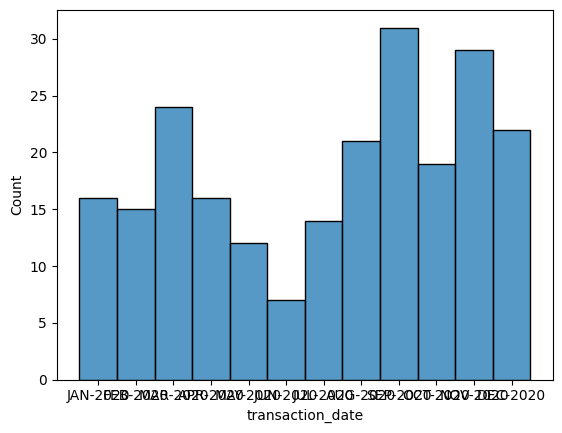

In [25]:
sns.histplot(data=kavin, x='transaction_date')

Looking at the histogram plot above, we can see 2 distinct peaks in the plot, one occurring in the month of March and the other in the month of September. This pattern suggests a bimodal distribution that could potentially be suitable for modelling this set of values. For instance, it could provide some underlying patterns of sellers that explain the higher sales in certain months and lower sales in others. However, some limitations of this distribution include factors that impact selling of houses. For instance, in an economic downturn or a global pandemic like Covid-19, there would be fewer buyers in the market, resulting in fewer houses being sold.

## Task 3: Property agents tend to specialise in one or more specific geographical areas, rather than ply their trade equally island-wide. Given a property agent who has closed sales in Sembawang and Yishun during a given year, which other town is he/she most likely to be active in that year? (Note: you may wish to use association rules for this task.)

In [26]:
town_df = data.groupby(['transaction_year'])['town'].apply(list).reset_index()
town_df['town'] = town_df['town'].apply(lambda x: str(x).replace('[','').replace(']','').replace('\'', ''))
filtered_town_df = town_df.loc[town_df["town"].str.contains("SEMBAWANG|YISHUN")]
filtered_town_df['town'] = filtered_town_df['town'].apply(lambda x: x.split(', '))

In [27]:
filtered_town_df

transaction_year                                               town
0             2017  [YISHUN, CHOA CHU KANG, WOODLANDS, TAMPINES, T...
1             2018  [CHOA CHU KANG, SEMBAWANG, JURONG WEST, CENTRA...
2             2019  [SEMBAWANG, JURONG WEST, YISHUN, PASIR RIS, GE...
3             2020  [QUEENSTOWN, SERANGOON, BUKIT PANJANG, TOA PAY...
4             2021  [PASIR RIS, ANG MO KIO, CLEMENTI, CENTRAL AREA...
5             2022  [BISHAN, PUNGGOL, YISHUN, JURONG EAST, PUNGGOL...
6             2023  [ANG MO KIO, CLEMENTI, TAMPINES, BUKIT BATOK, ...

In [28]:
result = {}
for index, row in filtered_town_df.iterrows():
    year = row['transaction_year']
    towns = row['town']
    towns = [i for i in towns if (i != 'YISHUN') & (i != 'SENBAWANG')]
    unique_towns = list(set(towns))
    result[year] = {}
    for town in unique_towns:
        result[year][town] = towns.count(town)

for year, town_counts in result.items():
    max_town = max(town_counts)
    print(f"Given a property agent who has closed sales in Sembawang and Yishun during {year}, he/she is most likely to be active {max_town} in that year.") 
    

Given a property agent who has closed sales in Sembawang and Yishun during 2017, he/she is most likely to be active WOODLANDS in that year.
Given a property agent who has closed sales in Sembawang and Yishun during 2018, he/she is most likely to be active WOODLANDS in that year.
Given a property agent who has closed sales in Sembawang and Yishun during 2019, he/she is most likely to be active WOODLANDS in that year.
Given a property agent who has closed sales in Sembawang and Yishun during 2020, he/she is most likely to be active WOODLANDS in that year.
Given a property agent who has closed sales in Sembawang and Yishun during 2021, he/she is most likely to be active WOODLANDS in that year.
Given a property agent who has closed sales in Sembawang and Yishun during 2022, he/she is most likely to be active WOODLANDS in that year.
Given a property agent who has closed sales in Sembawang and Yishun during 2023, he/she is most likely to be active WOODLANDS in that year.


By rule of association, Woodlands is belongs very close to the regions of Sembawang and Yishun, hence the result makes sense.

# 3. Classification

In [29]:
import json
with open("data/WirelessHotSpotsGEOJSON.geojson") as f:
    json = json.load(f)

json = json['features']
data = []

In [30]:
for each in json:
    
    hotspot_name = each['properties']['Name']
    loc_name = each['properties']['Description'].split('<th>')[3].split('<td>')[1].split('</td>')[0]
    loc_type = each['properties']['Description'].split('<th>')[4].split('<td>')[1].split('</td>')[0]
    postal = each['properties']['Description'].split('<th>')[5].split('<td>')[1].split('</td>')[0]
    address = each['properties']['Description'].split('<th>')[6].split('<td>')[1].split('</td>')[0]
    operator = each['properties']['Description'].split('<th>')[7].split('<td>')[1].split('</td>')[0]
    longitude = each['geometry']['coordinates'][0]
    latitude = each['geometry']['coordinates'][1]
    
    temp = [hotspot_name, loc_name, loc_type, postal, address, operator, longitude, latitude]
    
    data.append(temp)

In [31]:
data = pd.DataFrame(data, columns = ['name', 'location_name', 'location_type', 'postal_code', 'street_address', 'operator_name', 'longitude', 'latitude'])
data

name          location_name     location_type postal_code  \
0        kml_1         Bukit Batok CC         Community      659959   
1        kml_2     1 Northpoint Drive         Community      768019   
2        kml_3        155 Waterloo St        Government      187962   
3        kml_4  20 Upper Pickering St         Community      058284   
4        kml_5         7 Star Canteen               F&B      540338   
...        ...                    ...               ...         ...   
1795  kml_1796         Whampoa Market               F&B      320091   
1796  kml_1797        Woodleigh - NEL  Public Transport      347695   
1797  kml_1798       Yishun MRT - NSL  Public Transport      769093   
1798  kml_1799            Yuhua Place               F&B      600347   
1799  kml_1800          Yuhua Village               F&B      600254   

                 street_address operator_name   longitude  latitude  
0        21 Bukit Batok Central            M1  103.747514  1.350191  
1            1 Northpoint Drive            M1  103.836092  1.428036  
2           155 Waterloo Street            M1  103.852975  1.300197  
3     20 Upper Pickering Street            M1  103.846479  1.286329  
4       338 Anchorvale Crescent            M1  103.889654  1.399229  
...                         ...           ...         ...       ...  
1795           91 Whampoa Drive       Singtel  103.854060  1.323428  
1796   400 Upper Serangoon Road       Singtel  103.870818  1.339190  
1797        301 Yishun Avenue 2       Singtel  103.834995  1.429525  
1798   347 Jurong East Avenue 1       Singtel  103.731580  1.345313  
1799  254 Jurong East Street 24       Singtel  103.737738  1.343488  

[1800 rows x 8 columns]

## Task 1: From the table, what are some of the information you can deduce for each hotspot?

We can see that each hotspot is placed at a specific location

In [32]:
data['coordinates'] = data['latitude'].astype(str) + ", " + data['longitude'].astype(str) 
print(f"There are {len(data['coordinates'].unique())} unique coordinates for the hotspots")

There are 1305 unique coordinates for the hotspots


From the table, we can see that there are 1800 unique hotspots, but only 1305 unique coordinates. This means that some of the hotspots are located at the same place

In [33]:
print(f"There are {len(data['name'].unique())} unique hotspots")
print(f"THere are {len(data['location_name'].unique())} unique location names")

There are 1800 unique hotspots
THere are 1758 unique location names


## Task 2: Due to a system error, the location type column for the last 200 rows of the dataset has become garbled. Using all earlier rows as well as all other columns in the dataset, build a classification model to predict the location type for these hotspots. You may treat the three rarest location types as one category. (Note: you may wish to create some additional features based on available ones.)

In [34]:
# 3 rarest locations
print(data['location_type'].value_counts())
rare_locs = ['Public Worship', 'Dormitory / Care Centre', 'Tourist Attraction']

location_type
Community                  557
F&B                        428
Healthcare                 415
Commercial                 125
Welfare Organisation       123
Public Transport            46
Government                  25
School                      24
Retail Shop                 23
Shopping Mall               16
Tourist Attraction          12
Dormitory / Care Centre      4
Public Worship               2
Name: count, dtype: int64


In [35]:
location_type = ['rare category' if i in rare_locs else i for i in data['location_type']]
data['location_type'] = location_type

In [36]:
data['operator_name'].unique()

array(['M1', 'MyRepublic', 'Singtel', 'StarHub'], dtype=object)

In [37]:
operator = [1 if i=='M1' else 2 if i=='MyRepublic' else 3 if i =='Singtel' else 4 for i in data['operator_name']]
data['operator_name'] = operator

In [38]:
train_data = data.iloc[0:1599, :]
test_data = data.iloc[1600:,:]
xcols = ['postal_code', 'operator_name', 'longitude', 'latitude']
ycol = ['location_type']
X_train = train_data[xcols]
y_train = train_data[ycol]
X_test = test_data[xcols]
y_test = test_data[ycol]

In [39]:
from sklearn.ensemble._forest import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(X_train, y_train)

/opt/anaconda3/envs/dsaid_tap_interview/lib/python3.10/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [40]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.52

In [41]:
# y_test['predicted_location_type'] = y_pred
# y_test

## Task 3: The information has now been recovered from a backup copy of the file. Compared to the true location types, how good was your model? Be prepared to explain the metrics you use to evaluate your model.

In [42]:
print(f" The accuracy is {accuracy_score(y_test, y_pred)}")

 The accuracy is 0.52


Since this was a multiclass classification, accuracy would be a suitable metric to evaluate the model.

# 4. Data Visualisation
Please run `streamlit run streamlit/main.py` to view dashboard for this question.

In [43]:
# Prepare summary table
dict = [{"Industry": "A",
        "Median Salary": 3150,
        "Count": 83},
        {"Industry": "B",
        "Median Salary": 3300,
        "Count": 53},
        {"Industry": "C",
        "Median Salary": 2650,
        "Count": 47},    
        {"Industry": "D",
        "Median Salary": 2400,
        "Count": 12}, 
        {"Industry": "E",
        "Median Salary": 4100,
        "Count": 30},
        {"Industry": "F",
        "Median Salary": 3400,
        "Count": 23},
        {"Industry": "G",
        "Median Salary": 2800,
        "Count": 12},
        {"Industry": "H",
        "Median Salary": 2300,
        "Count": 8},
        {"Industry": "Others",
        "Median Salary": 2900,
        "Count": 21},

        {"Industry": "A",
        "Median Salary": 3000,
        "Count": 23},
        {"Industry": "B",
        "Median Salary": 3100,
        "Count": 9},
        {"Industry": "C",
        "Median Salary": 2600,
        "Count": 32},    
        {"Industry": "D",
        "Median Salary": 2400,
        "Count": 15}, 
        {"Industry": "E",
        "Median Salary": 3900,
        "Count": 3},
        {"Industry": "F",
        "Median Salary": 3150,
        "Count": 7},
        {"Industry": "G",
        "Median Salary": 2600,
        "Count": 22},
        {"Industry": "H",
        "Median Salary": 2200,
        "Count": 11},
        {"Industry": "Others",
        "Median Salary": 1900,
        "Count": 28},     
       ]
             
         
         
data = pd.DataFrame.from_records(dict)
student_group = ['Student Group X']*9 + ['Student Group Y']*9
job_nature = (['Closely related to course of study']*4 + ['Somewhat related to course of study']*4 + ['Unrelated to course of study'])*2
data['Student Group'] = student_group
data['Job Nature'] = job_nature
cols = ['Student Group', 'Job Nature', 'Industry', 'Median Salary', 'Count']
data = data[cols]   

In [44]:
data

Student Group                           Job Nature Industry  \
0   Student Group X   Closely related to course of study        A   
1   Student Group X   Closely related to course of study        B   
2   Student Group X   Closely related to course of study        C   
3   Student Group X   Closely related to course of study        D   
4   Student Group X  Somewhat related to course of study        E   
5   Student Group X  Somewhat related to course of study        F   
6   Student Group X  Somewhat related to course of study        G   
7   Student Group X  Somewhat related to course of study        H   
8   Student Group X         Unrelated to course of study   Others   
9   Student Group Y   Closely related to course of study        A   
10  Student Group Y   Closely related to course of study        B   
11  Student Group Y   Closely related to course of study        C   
12  Student Group Y   Closely related to course of study        D   
13  Student Group Y  Somewhat related to course of study        E   
14  Student Group Y  Somewhat related to course of study        F   
15  Student Group Y  Somewhat related to course of study        G   
16  Student Group Y  Somewhat related to course of study        H   
17  Student Group Y         Unrelated to course of study   Others   

    Median Salary  Count  
0            3150     83  
1            3300     53  
2            2650     47  
3            2400     12  
4            4100     30  
5            3400     23  
6            2800     12  
7            2300      8  
8            2900     21  
9            3000     23  
10           3100      9  
11           2600     32  
12           2400     15  
13           3900      3  
14           3150      7  
15           2600     22  
16           2200     11  
17           1900     28

In [45]:
# Total students
student_count = data.groupby('Student Group')['Count'].sum().reset_index()
total_X_students = student_count.loc[student_count['Student Group'] == 'Student Group X']['Count'].values[0]
total_Y_students = student_count.loc[student_count['Student Group'] == 'Student Group Y']['Count'].values[0]
total_students = total_X_students + total_Y_students
print(total_X_students)
print(total_Y_students)

289
150


In [46]:
# fig1= px.bar(salary_data, x="Industry", y="Count", color='Student Group', title="Student Count by Industry", barmode="group")
# fig1.show()
# fig2= px.bar(salary_data, x="Job Nature", y="Count", color='Student Group', title="Student Count by Job Nature", barmode="group")
# fig2.show()

In [47]:
# Average median salary based on student group
avg_median_salary = data.groupby('Student Group')['Median Salary'].mean().reset_index()
avg_X_median_salary = round(avg_median_salary.loc[avg_median_salary['Student Group'] == 'Student Group X']['Median Salary'].values[0], 2)
avg_Y_median_salary = round(avg_median_salary.loc[avg_median_salary['Student Group'] == 'Student Group Y']['Median Salary'].values[0], 2)
total_avg_median_salary = round(avg_median_salary['Median Salary'].mean(), 2)
print(avg_X_median_salary)
print(avg_Y_median_salary)

3000.0
2761.11


In [48]:
avg_median_salary

Student Group  Median Salary
0  Student Group X    3000.000000
1  Student Group Y    2761.111111

In [49]:
# fig3 = px.line(salary_data, x="Industry", y="Median Salary", color='Student Group', hover_data='Count', symbol="Student Group")
# fig3.show()